In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
from sentence_transformers import SentenceTransformer, util
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# ✅ Load SBERT Model for semantic similarity
sbert_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# ✅ Load VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# ✅ Step 1: Define the 13 psychotherapy techniques
techniques = [
    "Reflections on Needs", "Reflections on Emotions", "Reflections on Values",
    "Reflections on Consequences", "Reflections on Conflicts", "Reflections on Strengths",
    "Questions on Experiences", "Questions on Perspectives", "Questions on Emotions",
    "Problem-Solving", "Planning", "Normalizing", "Psychoeducation"
]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# ✅ Step 2: Load response files separately for each model
df_llama = pd.read_csv("/content/llama_responses - llama_responses (1).csv")
df_gpt2 = pd.read_csv("/content/gpt2medium_responses - gpt2medium_responses (1).csv")
df_gemini = pd.read_csv("/content/gemini responses.csv")
df_falcon = pd.read_csv("/content/falcon_responses - falcon_responses.csv")
df_stablelm = pd.read_csv("/content/StableLMresponses - StableLMresponses.csv")

# ✅ Step 3: Store data in a dictionary for analysis
model_responses = {
    "LLaMA": df_llama,
    "GPT-2": df_gpt2,
    "Gemini": df_gemini,
    "Falcon": df_falcon,
    "StableLM": df_stablelm
}

In [ ]:
# ✅ Step 4: Function to evaluate responses for each technique
def evaluate_responses(model_responses):
    scores = {technique: {} for technique in techniques}

    # ✅ Compute embeddings for technique descriptions
    technique_embeddings = {tech: sbert_model.encode(tech, convert_to_tensor=True) for tech in techniques}

    # ✅ Iterate over each model's responses
    for model, df in model_responses.items():
        for technique in techniques:
            responses = df['generated_response'].tolist()
            if not responses: continue  # Skip if empty

            # ✅ Compute similarity scores
            similarities = []
            for response in responses:
                response_embedding = sbert_model.encode(response, convert_to_tensor=True)
                similarity = util.pytorch_cos_sim(response_embedding, technique_embeddings[technique]).item()
                similarities.append(similarity)

            avg_similarity = np.mean(similarities)

            # ✅ Compute sentiment scores
            sentiments = [analyzer.polarity_scores(resp)['compound'] for resp in responses]
            avg_sentiment = np.mean(sentiments)

            # ✅ Balance similarity and sentiment (weighted sum)
            combined_score = (0.6 * avg_similarity) + (0.4 * avg_sentiment)  # Adjusted balance

            # ✅ Normalize score across all techniques collectively
            min_score, max_score = -1, 1  # Ensures distribution between -1 to 1
            normalized_score = np.interp(combined_score, (-1, 1), (min_score, max_score))

            scores[technique][model] = normalized_score

    return scores

# ✅ Step 5: Compute scores for each model
scores = evaluate_responses(model_responses)

# ✅ Step 6: Save all scores into a CSV file
df_scores = pd.DataFrame(scores).T  # Convert dictionary to DataFrame
df_scores.to_csv("psychotherapy_evaluation_scores.csv", index=True)  # Save to CSV

print("📊 All scores have been saved to 'psychotherapy_evaluation_scores.csv'.")

📊 All scores have been saved to 'psychotherapy_evaluation_scores.csv'.


<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


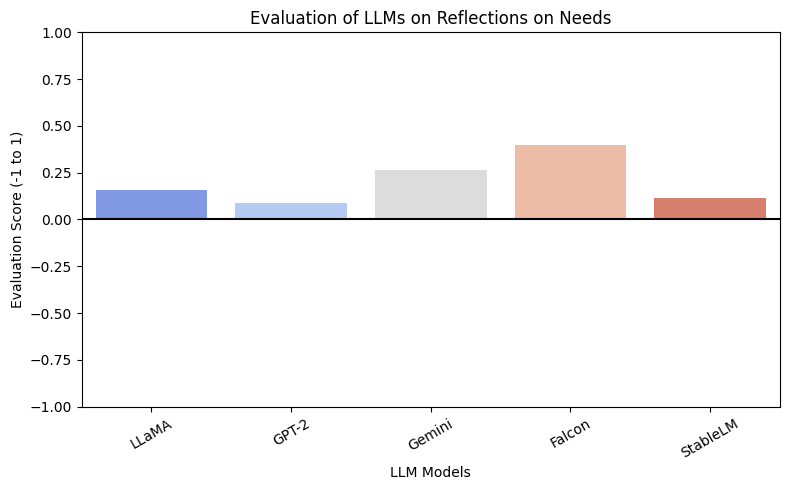

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


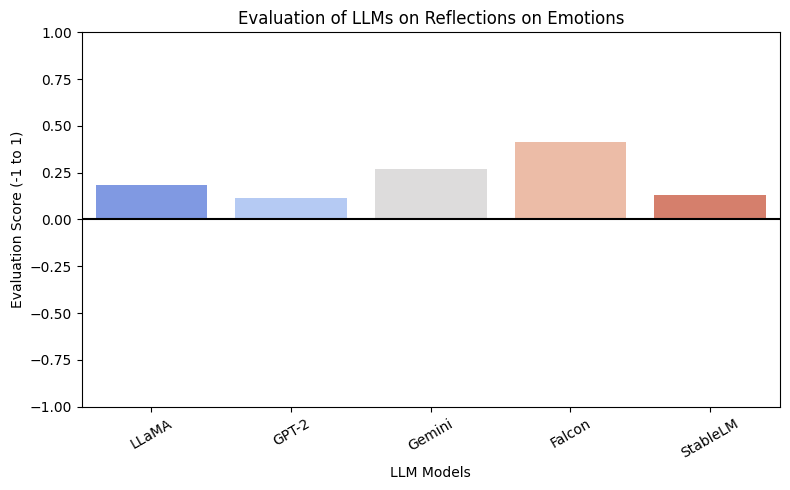

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


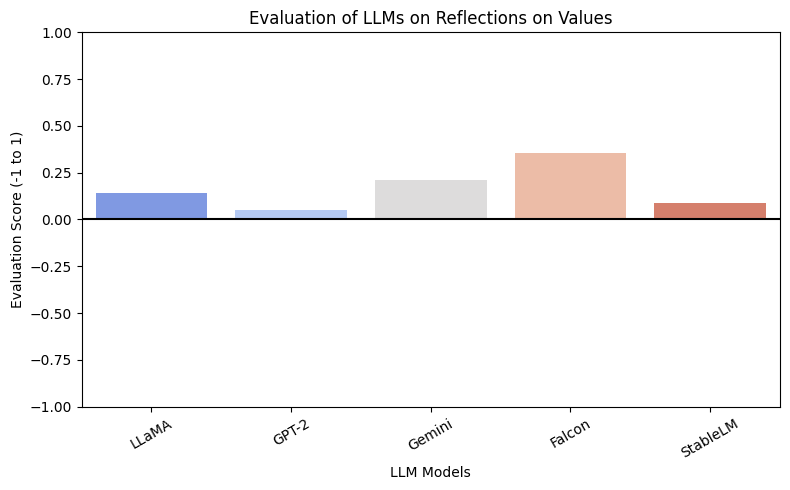

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


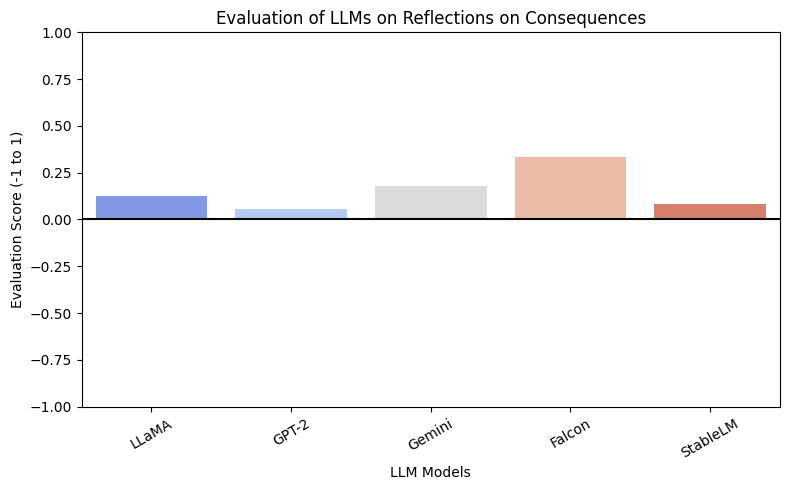

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


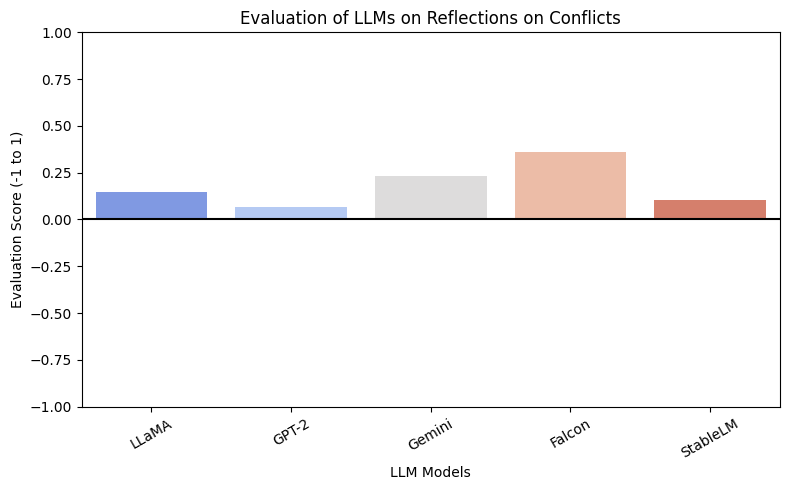

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


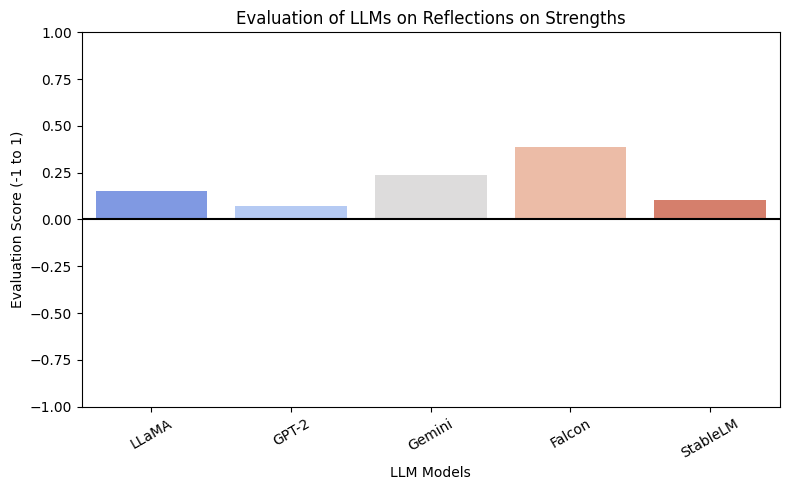

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


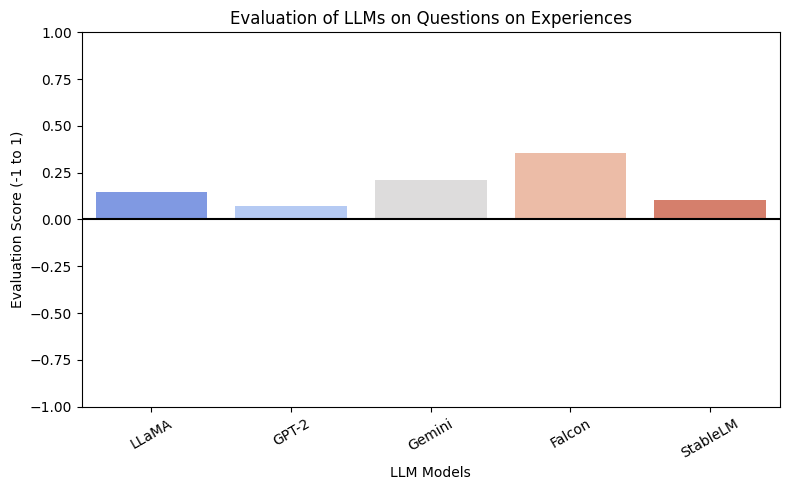

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


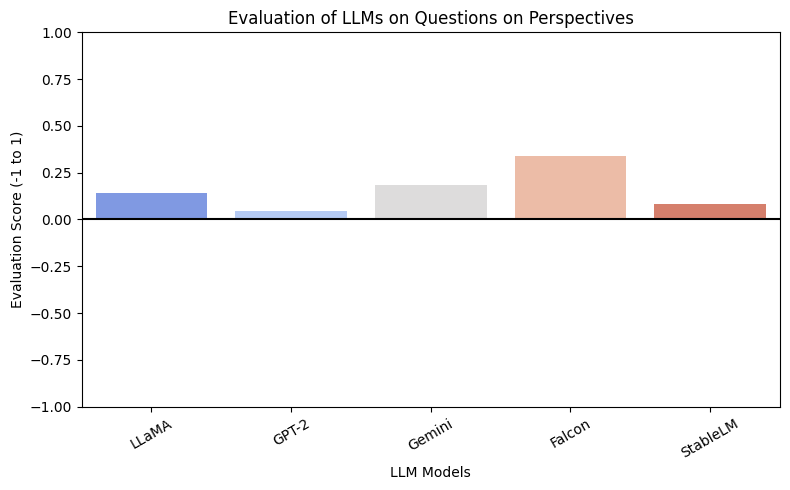

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


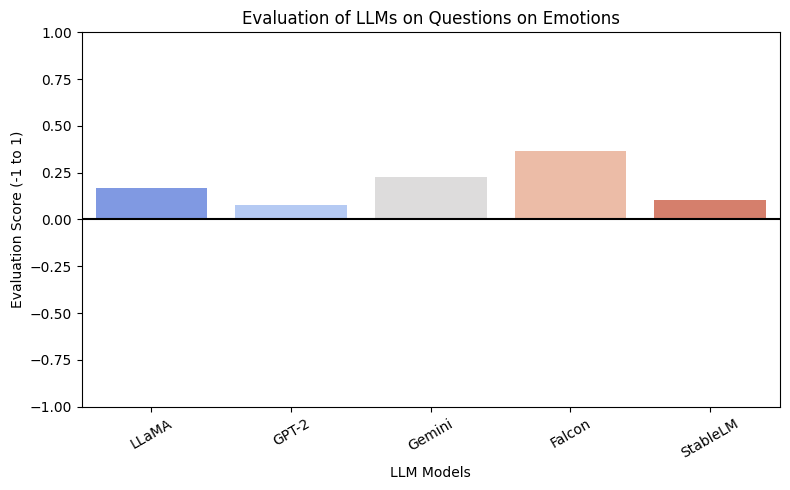

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


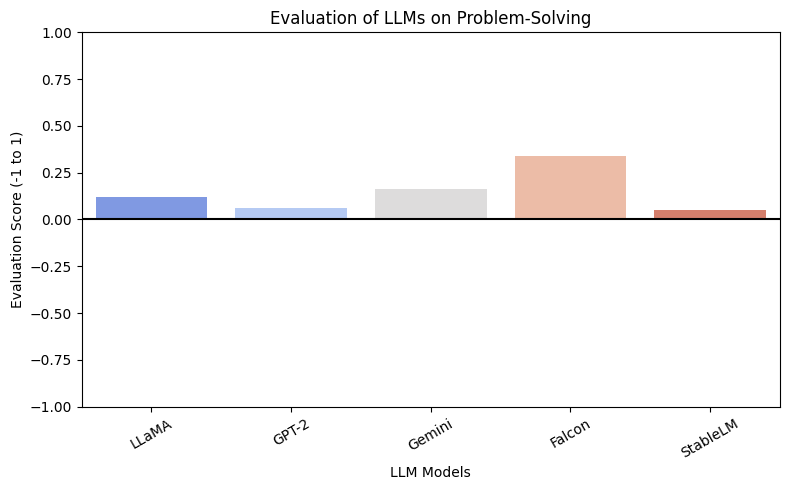

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


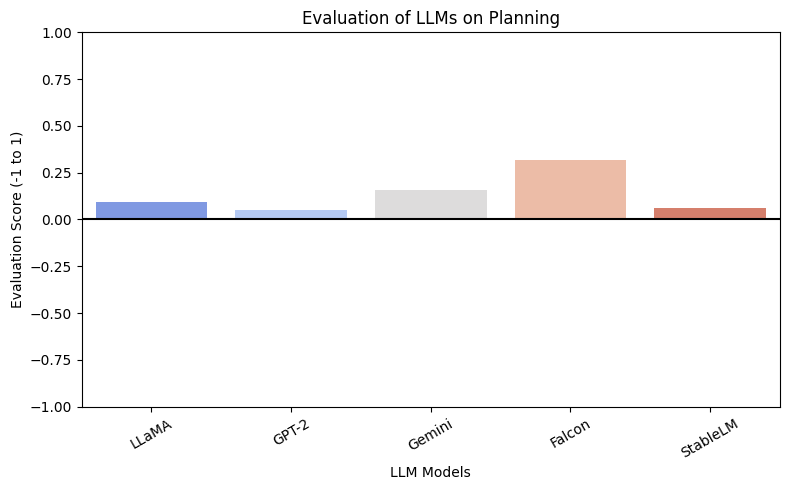

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


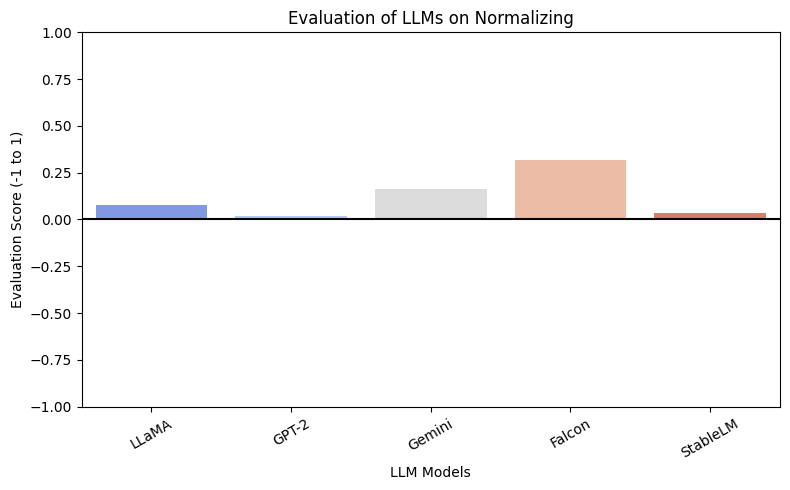

<ipython-input-6-c3b71f7d5434>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")


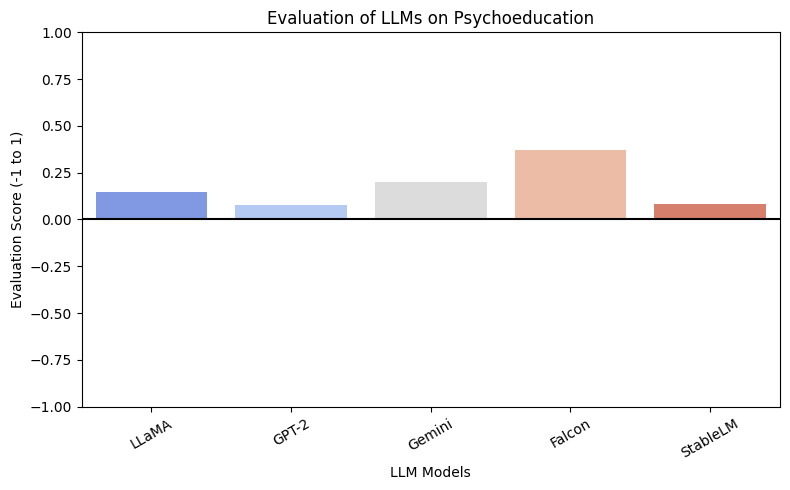

In [ ]:
# ✅ Step 7: Function to generate separate bar graphs for each psychotherapy technique
def plot_technique_graphs(scores):
    output_dir = "psychotherapy_graphs"
    os.makedirs(output_dir, exist_ok=True)

    for technique in techniques:
        plt.figure(figsize=(8, 5))
        ax = sns.barplot(x=list(scores[technique].keys()), y=list(scores[technique].values()), palette="coolwarm")

        ax.set_ylim(-1, 1)
        ax.axhline(0, color='black', linewidth=1.5)

        plt.title(f"Evaluation of LLMs on {technique}")
        plt.xlabel("LLM Models")
        plt.ylabel("Evaluation Score (-1 to 1)")
        plt.xticks(rotation=30)
        plt.tight_layout()

        plt.savefig(f"{output_dir}/{technique.replace(' ', '_')}.png")
        plt.show()

# ✅ Step 8: Generate graphs for each technique
plot_technique_graphs(scores)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.2 MB/s eta 0:00:00


#imrpovements:

## individual graphs:

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


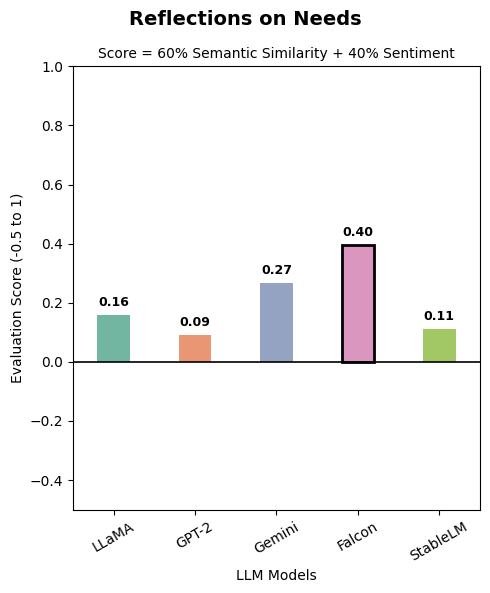

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


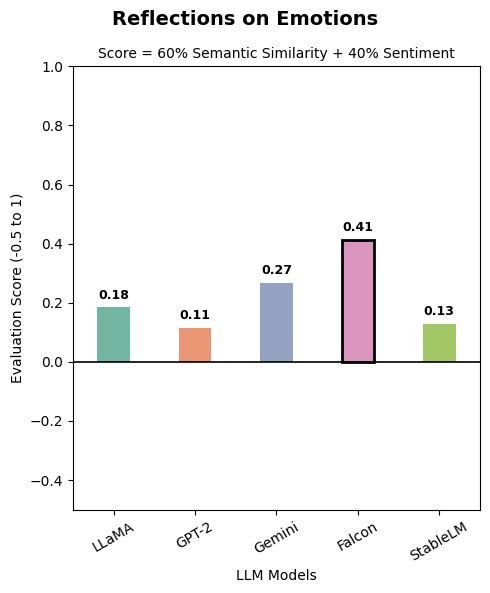

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


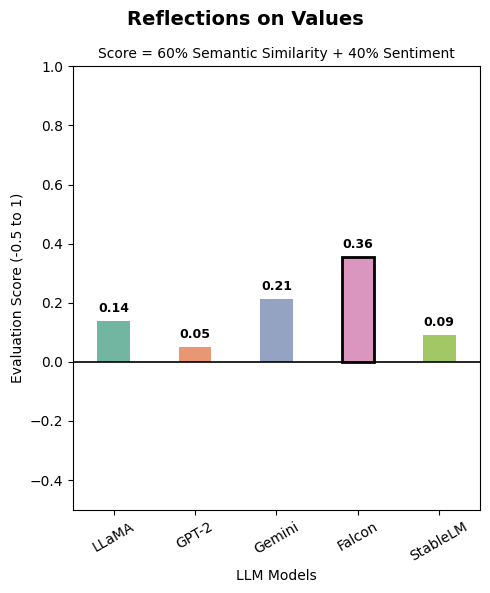

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


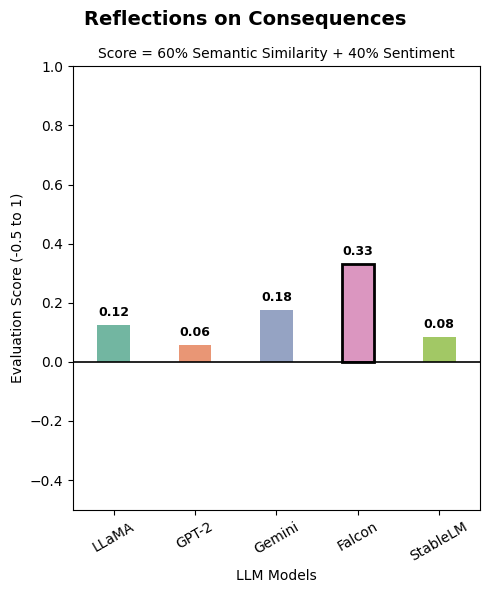

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


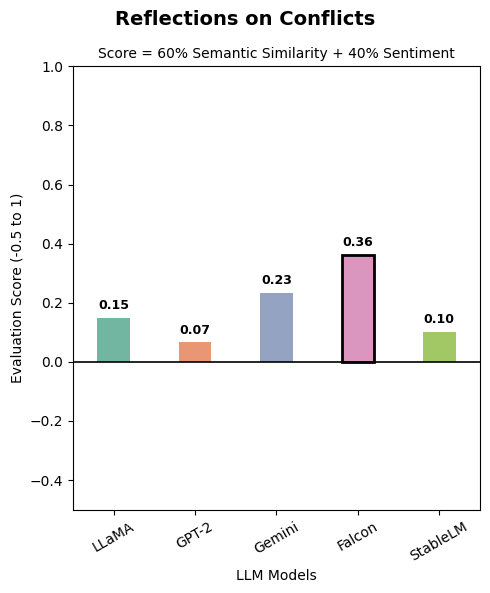

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


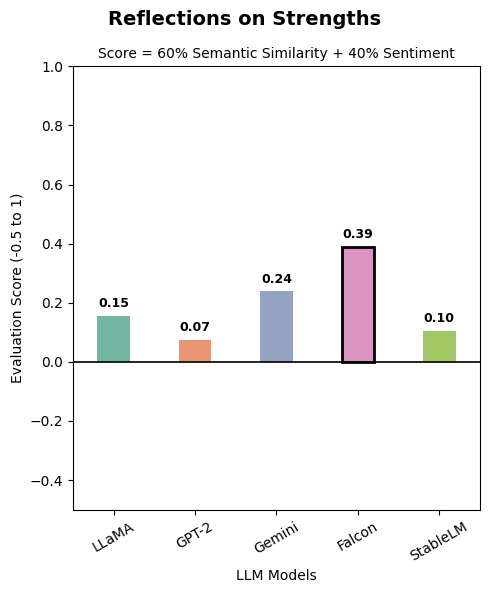

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


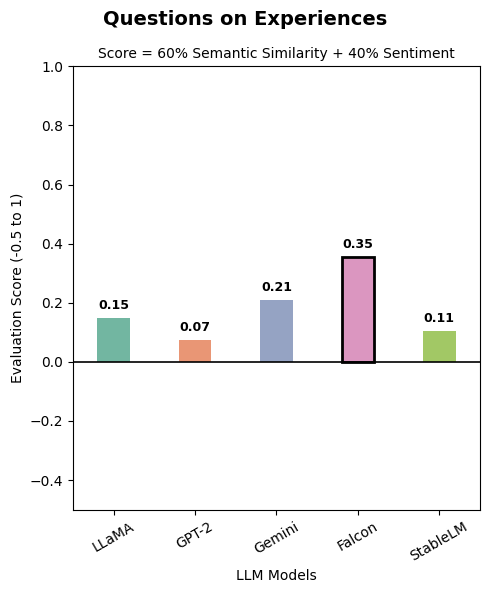

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


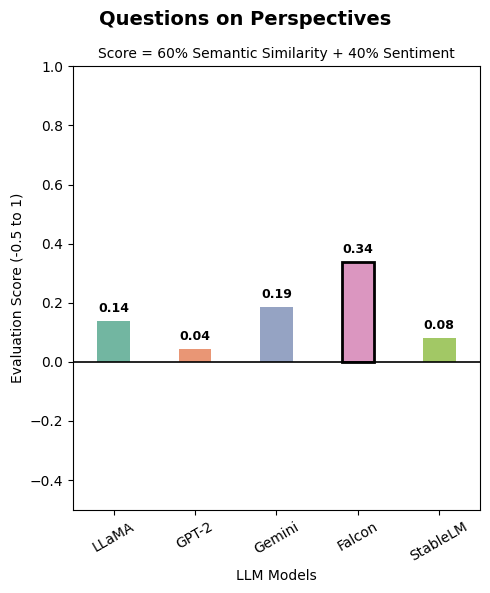

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


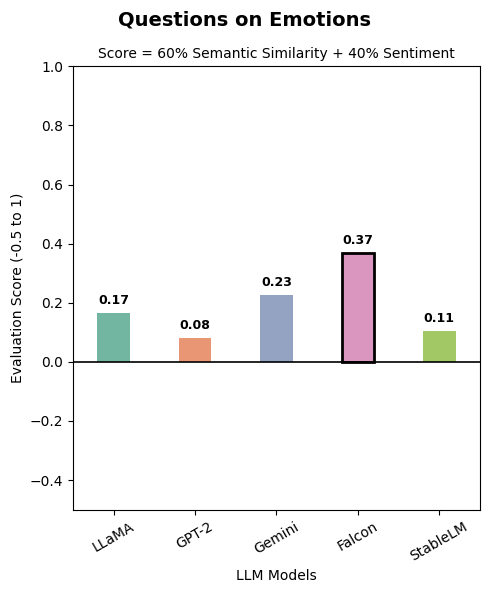

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


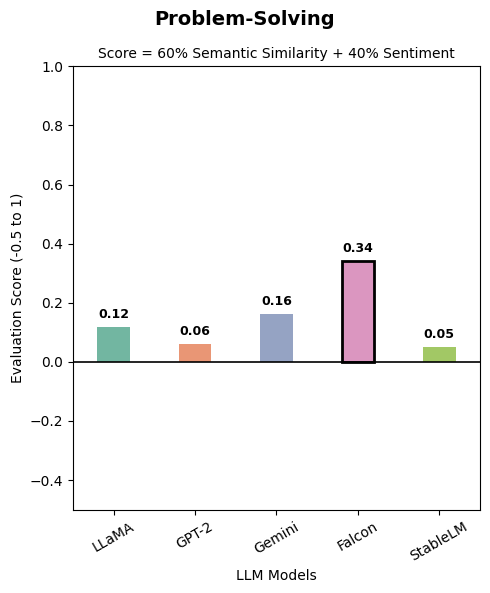

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


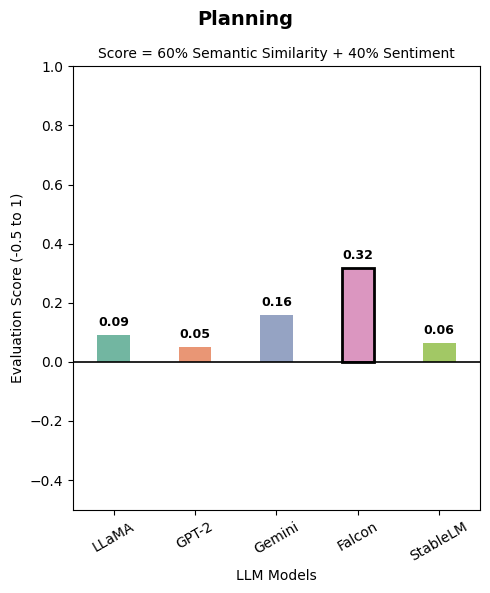

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


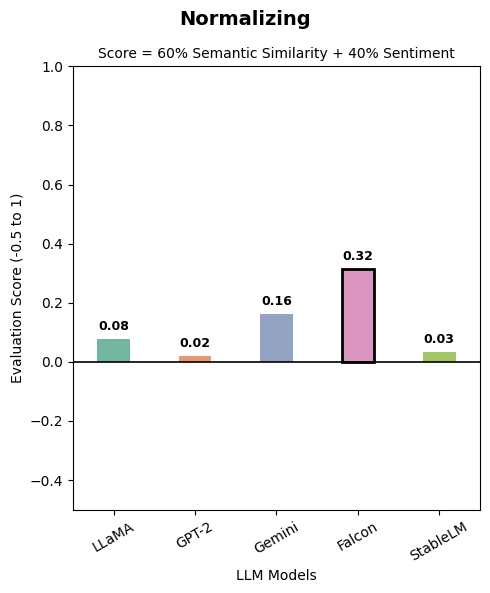

<ipython-input-23-b53ca7d5ced3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)
<ipython-input-23-b53ca7d5ced3>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)


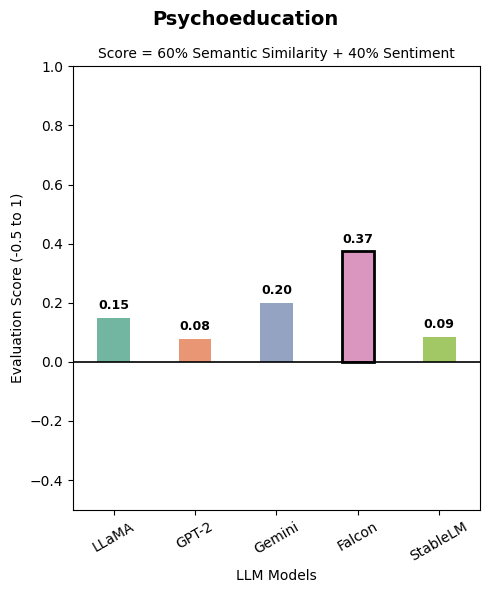

In [ ]:
def plot_technique_graphs(scores):
    output_dir = "psychotherapy_graphs"
    os.makedirs(output_dir, exist_ok=True)

    for technique in techniques:
        plt.figure(figsize=(5, 6))

        model_names = list(scores[technique].keys())
        model_scores = list(scores[technique].values())
        top_model = max(scores[technique], key=scores[technique].get)

        # Use a friendlier palette
        palette = sns.color_palette("Set2")
        ax = sns.barplot(x=model_names, y=model_scores, palette=palette, width=0.4)

        ax.set_ylim(-0.5, 1)
        ax.axhline(0, color='black', linewidth=1.2)

        # Highlight top model with edge
        for patch, label in zip(ax.patches, model_names):
            if label == top_model:
                patch.set_edgecolor('black')
                patch.set_linewidth(2)

        # Annotate scores on top/bottom of bars
        for i, score in enumerate(model_scores):
            ax.text(i, score + 0.02 if score >= 0 else score - 0.08,
                    f"{score:.2f}", ha='center',
                    va='bottom' if score >= 0 else 'top',
                    fontweight='bold', fontsize=9)

        # Titles and labels
        plt.suptitle(f"{technique}", fontsize=14, fontweight='bold')
        plt.title("Score = 60% Semantic Similarity + 40% Sentiment", fontsize=10)
        plt.xlabel("LLM Models")
        plt.ylabel("Evaluation Score (-0.5 to 1)")
        plt.xticks(rotation=30)
        plt.tight_layout()

        plt.savefig(f"{output_dir}/{technique.replace(' ', '_')}.png")
        plt.show()
# To save individual annotated graphs:
plot_technique_graphs(scores)

## combined graphs:

<ipython-input-25-dba70311e92c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-dba70311e92c>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(
<ipython-input-25-dba70311e92c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-dba70311e92c>:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(
<ipython-input-25-dba70311e92c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython

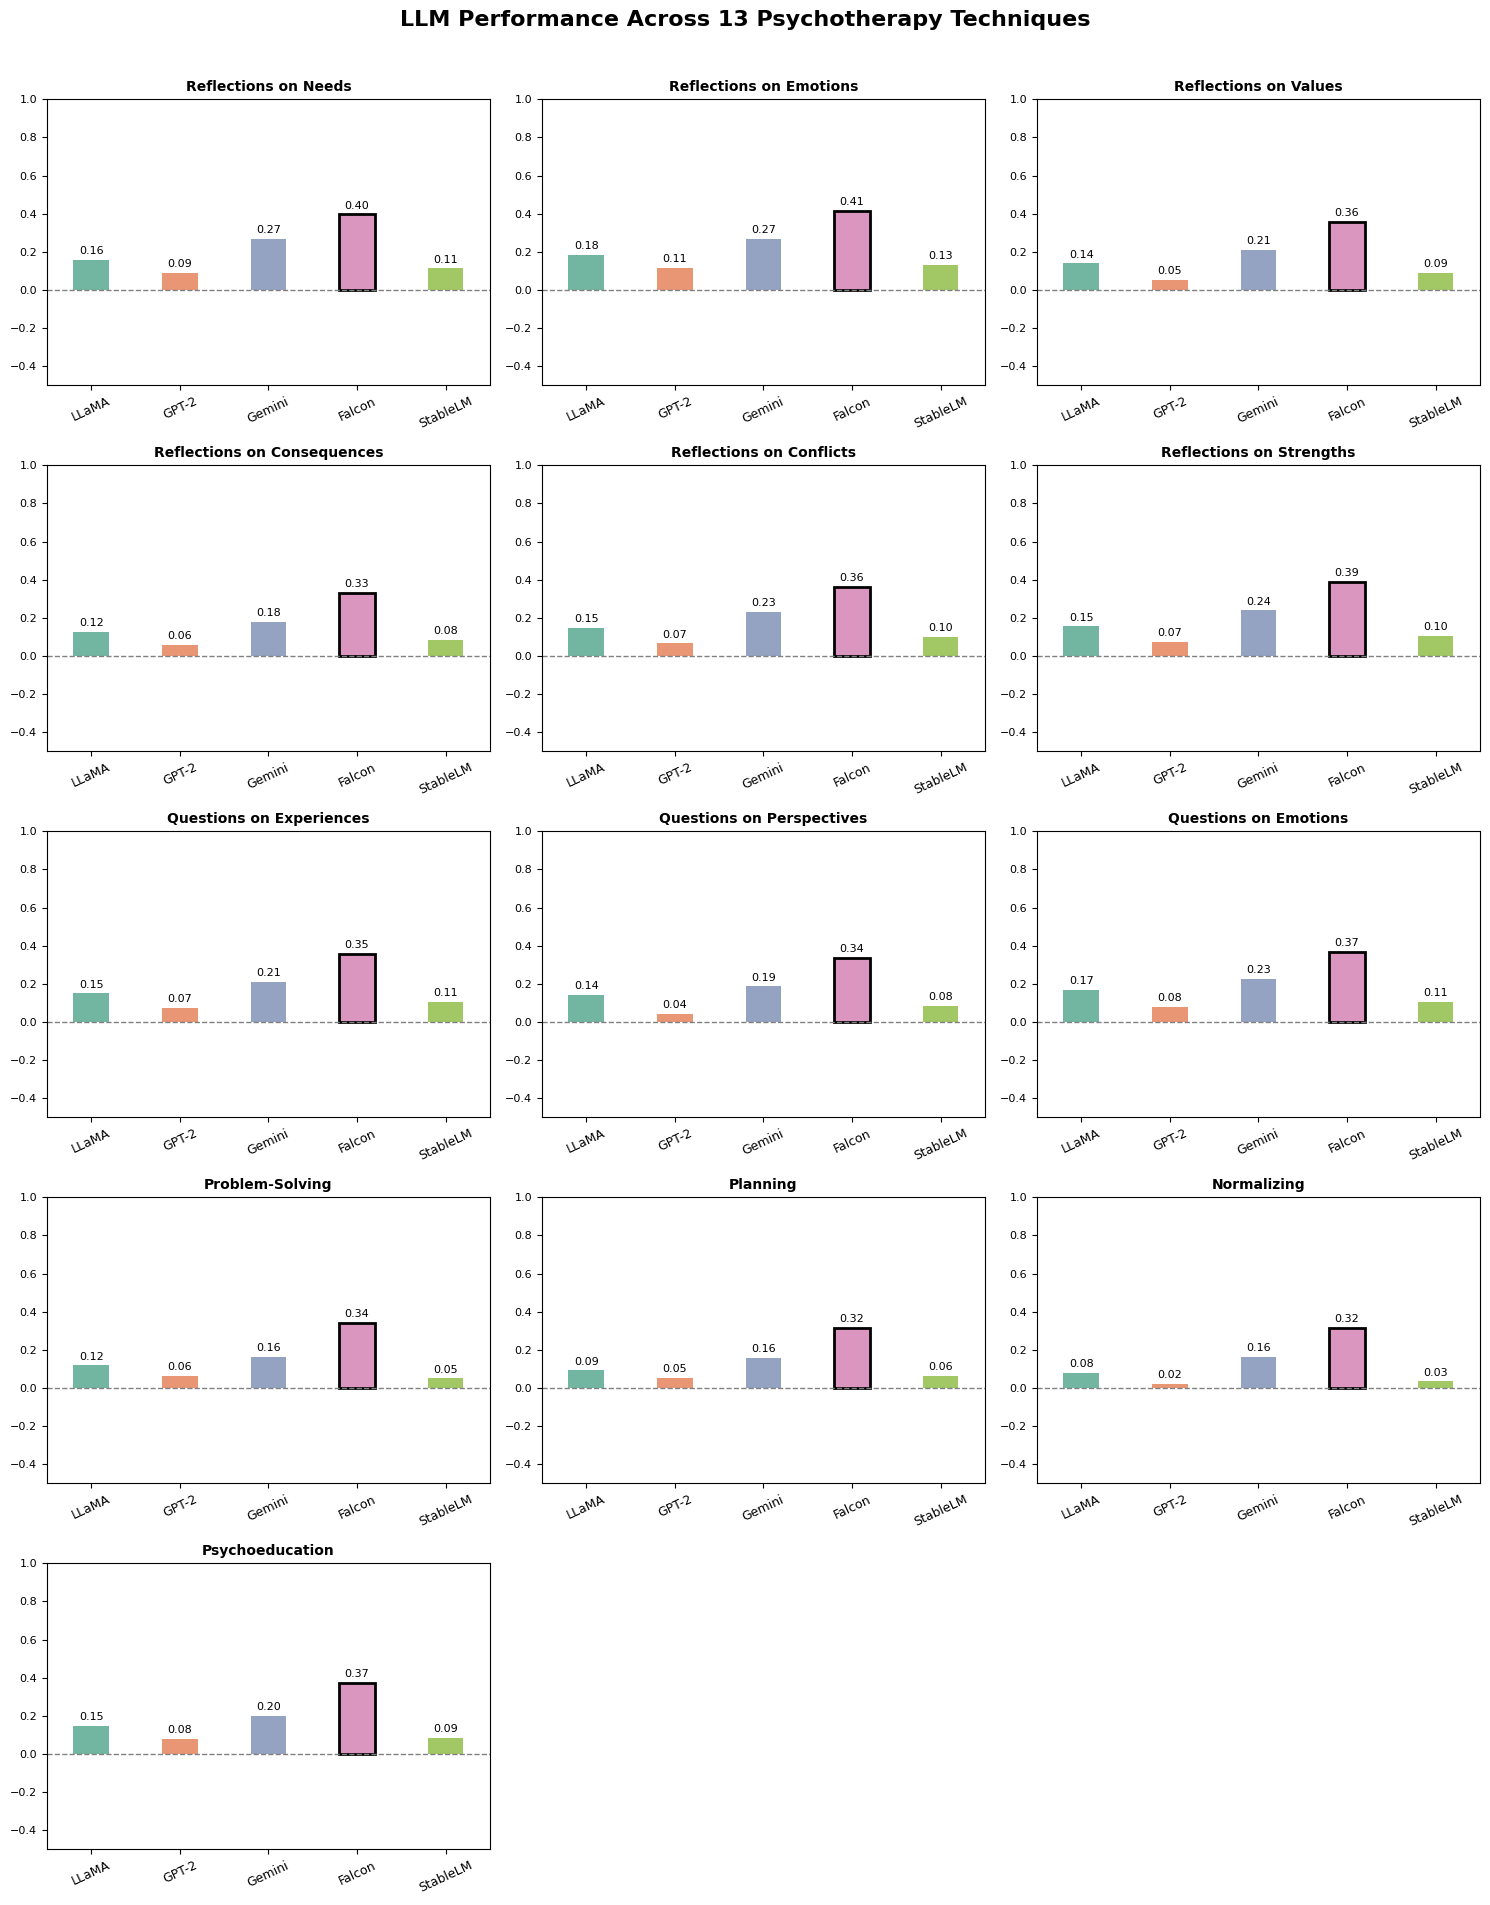

In [ ]:
def plot_all_techniques_grid(scores):
    num_rows = 5
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
    axes = axes.flatten()

    for i, technique in enumerate(techniques):
        ax = axes[i]
        model_names = list(scores[technique].keys())
        model_scores = list(scores[technique].values())
        top_model = max(scores[technique], key=scores[technique].get)

        palette = sns.color_palette("Set2")
        sns.barplot(
            ax=ax,
            x=model_names,
            y=model_scores,
            palette=palette,
            width=0.4  # slimmer bars
        )

        ax.set_ylim(-0.5, 1)
        ax.axhline(0, color='gray', linewidth=1, linestyle='--')
        ax.set_title(technique, fontsize=10, fontweight='bold')
        ax.tick_params(axis='x', labelrotation=25, labelsize=9)
        ax.tick_params(axis='y', labelsize=8)

        # Highlight top model
        for patch, label in zip(ax.patches, model_names):
            if label == top_model:
                patch.set_edgecolor('black')
                patch.set_linewidth(2)

        # Annotate scores
        for j, score in enumerate(model_scores):
            ax.text(j, score + 0.02 if score >= 0 else score - 0.06,
                    f"{score:.2f}", ha='center',
                    va='bottom' if score >= 0 else 'top',
                    fontsize=8)

    # Remove unused subplots (if any)
    for j in range(len(techniques), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("LLM Performance Across 13 Psychotherapy Techniques", fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()


# To see all in one grid view:
plot_all_techniques_grid(scores)

# EXTRAS:

## heatmap:

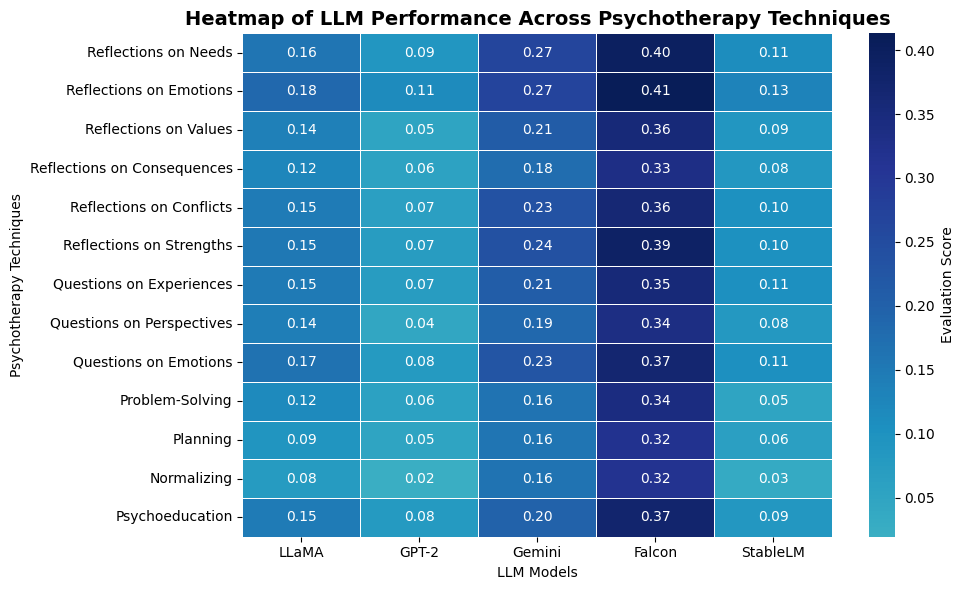

In [ ]:
def plot_heatmap(scores):
    df = pd.DataFrame(scores).T  # techniques as rows, models as columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap='YlGnBu', center=0, fmt=".2f", linewidths=0.5, cbar_kws={"label": "Evaluation Score"})
    plt.title("Heatmap of LLM Performance Across Psychotherapy Techniques", fontsize=14, fontweight='bold')
    plt.xlabel("LLM Models")
    plt.ylabel("Psychotherapy Techniques")
    plt.tight_layout()
    plt.show()

plot_heatmap(scores)

## radar chart:

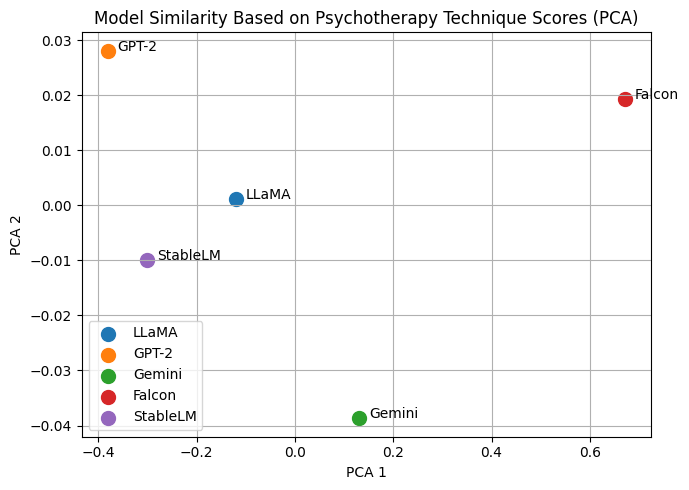

In [ ]:
from sklearn.decomposition import PCA

def plot_model_clusters(scores):
    df = pd.DataFrame(scores).T  # Techniques as rows, models as columns
    pca = PCA(n_components=2)
    coords = pca.fit_transform(df.T)

    plt.figure(figsize=(7, 5))
    for i, model in enumerate(df.columns):
        plt.scatter(coords[i, 0], coords[i, 1], label=model, s=100)
        plt.text(coords[i, 0] + 0.02, coords[i, 1], model, fontsize=10)

    plt.title("Model Similarity Based on Psychotherapy Technique Scores (PCA)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_model_clusters(scores)

# REPORT/INSIGHTS:

In [ ]:
def generate_top_insights(scores, top_n=2):
    df = pd.DataFrame(scores).T  # Techniques as rows, models as columns

    insights = []

    # 🔹 Find top N models per technique
    for technique in df.index:
        top_models = df.loc[technique].sort_values(ascending=False).head(top_n)
        bottom_models = df.loc[technique].sort_values(ascending=True).head(top_n)

        top_text = f"🏆 For **{technique}**, top models are: " + ", ".join([f"{model} ({score:.2f})" for model, score in top_models.items()])
        low_text = f"🔻 Models struggling with **{technique}**: " + ", ".join([f"{model} ({score:.2f})" for model, score in bottom_models.items()])

        insights.append(top_text)
        insights.append(low_text)

    # 🔹 Optionally: find overall model rankings
    model_means = df.mean()
    top_models_overall = model_means.sort_values(ascending=False)
    overall_text = "\n\n📊 **Overall Average Scores**:\n" + "\n".join([f"{model}: {score:.2f}" for model, score in top_models_overall.items()])
    insights.append(overall_text)

    return insights

In [ ]:
from IPython.display import display, Markdown

def display_clean_insights(insights):
    for i in range(0, len(insights) - 1, 2):
        technique_name = insights[i].split('**')[1]
        top_models = insights[i].split('top models are: ')[1]
        low_models = insights[i+1].split('Models struggling with ')[1]

        technique_block = f"""
---

### Technique: **{technique_name}**

**Top performing models:**
{top_models}

**Lowest scoring models:**
{low_models}
"""
        display(Markdown(technique_block))

    # Overall model averages
    overall_text = insights[-1]
    overall_block = """
---

## Overall Average Model Scores
"""
    for line in overall_text.splitlines()[1:]:
        overall_block += f"- **{line.strip()}**\n"

    display(Markdown(overall_block))

# 🔍 Call this to display insights
display_clean_insights(insights)


---

### Technique: **Reflections on Needs**

**Top performing models:**  
Falcon (0.40), Gemini (0.27)

**Lowest scoring models:**  
**Reflections on Needs**: GPT-2 (0.09), StableLM (0.11)



---

### Technique: **Reflections on Emotions**

**Top performing models:**  
Falcon (0.41), Gemini (0.27)

**Lowest scoring models:**  
**Reflections on Emotions**: GPT-2 (0.11), StableLM (0.13)



---

### Technique: **Reflections on Values**

**Top performing models:**  
Falcon (0.36), Gemini (0.21)

**Lowest scoring models:**  
**Reflections on Values**: GPT-2 (0.05), StableLM (0.09)



---

### Technique: **Reflections on Consequences**

**Top performing models:**  
Falcon (0.33), Gemini (0.18)

**Lowest scoring models:**  
**Reflections on Consequences**: GPT-2 (0.06), StableLM (0.08)



---

### Technique: **Reflections on Conflicts**

**Top performing models:**  
Falcon (0.36), Gemini (0.23)

**Lowest scoring models:**  
**Reflections on Conflicts**: GPT-2 (0.07), StableLM (0.10)



---

### Technique: **Reflections on Strengths**

**Top performing models:**  
Falcon (0.39), Gemini (0.24)

**Lowest scoring models:**  
**Reflections on Strengths**: GPT-2 (0.07), StableLM (0.10)



---

### Technique: **Questions on Experiences**

**Top performing models:**  
Falcon (0.35), Gemini (0.21)

**Lowest scoring models:**  
**Questions on Experiences**: GPT-2 (0.07), StableLM (0.11)



---

### Technique: **Questions on Perspectives**

**Top performing models:**  
Falcon (0.34), Gemini (0.19)

**Lowest scoring models:**  
**Questions on Perspectives**: GPT-2 (0.04), StableLM (0.08)



---

### Technique: **Questions on Emotions**

**Top performing models:**  
Falcon (0.37), Gemini (0.23)

**Lowest scoring models:**  
**Questions on Emotions**: GPT-2 (0.08), StableLM (0.11)



---

### Technique: **Problem-Solving**

**Top performing models:**  
Falcon (0.34), Gemini (0.16)

**Lowest scoring models:**  
**Problem-Solving**: StableLM (0.05), GPT-2 (0.06)



---

### Technique: **Planning**

**Top performing models:**  
Falcon (0.32), Gemini (0.16)

**Lowest scoring models:**  
**Planning**: GPT-2 (0.05), StableLM (0.06)



---

### Technique: **Normalizing**

**Top performing models:**  
Falcon (0.32), Gemini (0.16)

**Lowest scoring models:**  
**Normalizing**: GPT-2 (0.02), StableLM (0.03)



---

### Technique: **Psychoeducation**

**Top performing models:**  
Falcon (0.37), Gemini (0.20)

**Lowest scoring models:**  
**Psychoeducation**: GPT-2 (0.08), StableLM (0.09)



---

## Overall Average Model Scores
- ****
- **📊 **Overall Average Scores**:**
- **Falcon: 0.36**
- **Gemini: 0.21**
- **LLaMA: 0.14**
- **StableLM: 0.09**
- **GPT-2: 0.07**
